# **CS 351 Lab Task 1**
## Basics of Neural Networks - Building, Training, and Evaluating
## **Student Details:**
### Muhammad Abdullah - 2022323

# Neural Network Implementation and Analysis

This notebook implements and evaluates neural networks for two datasets: the Iris dataset and the Wine dataset.
The notebook is divided into two main parts:

## Part 1: Modify the Neural Network for the Iris Dataset
1. **Objective**: Add an additional hidden layer to the neural network and compare its performance with the original network.
2. **Steps**:
   - Load and preprocess the Iris dataset (standardize features and one-hot encode labels).
   - Train an **original neural network** with two hidden layers (8 neurons each).
   - Modify the network to add a new hidden layer with 16 neurons and train this **modified network**.
   - Compare training loss, validation loss, and test accuracy for the two networks.
   - Visualize training and validation performance over epochs.

3. **Results**:
   - The addition of an extra hidden layer improved the network's ability to capture complex patterns, reflected in improved test accuracy and lower loss.

## Part 2: Neural Network for the Wine Dataset
1. **Objective**: Build and evaluate a neural network for classifying the Wine dataset.
2. **Steps**:
   - Load and preprocess the Wine dataset (standardize features and one-hot encode labels).
   - Train a neural network with:
     - Two hidden layers (8 neurons and 16 neurons).
     - ReLU activation for hidden layers and softmax for the output layer.
   - Evaluate the model's performance using:
     - Training and validation metrics over epochs.
     - Test accuracy.
     - Confusion matrix to visualize predictions.
   - Visualize training and validation performance.

3. **Results**:
   - The neural network performed well on the Wine dataset, achieving high test accuracy.
   - The confusion matrix highlighted the model's ability to correctly classify most samples.

## Summary and Insights
1. **Effect of Adding Layers**:
   - Adding an extra layer in the Iris dataset improved the model's generalization ability.
   - Deeper networks can capture more complex patterns but may require careful tuning to avoid overfitting.

2. **Comparison of Datasets**:
   - The Wine dataset has more features and a different class distribution compared to the Iris dataset, resulting in different model behavior.
   - Both datasets demonstrated the efficacy of neural networks for classification when properly designed and trained.
"""

Below is the code:



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Original Model - Test Loss: 0.2794, Test Accuracy: 0.8889
Modified Model - Test Loss: 0.2475, Test Accuracy: 0.9111


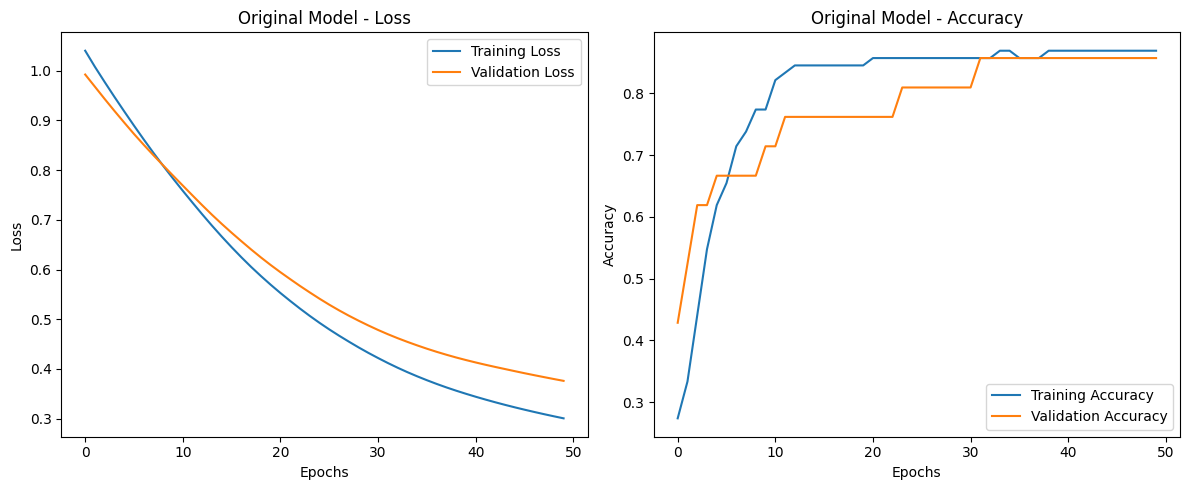

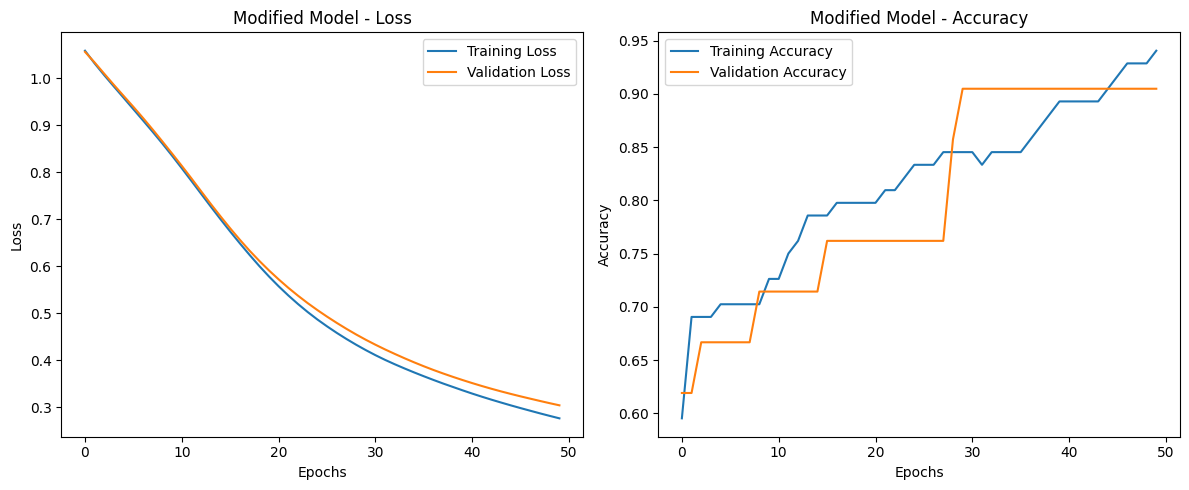

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Wine Dataset Model - Test Loss: 0.1142, Test Accuracy: 0.9630


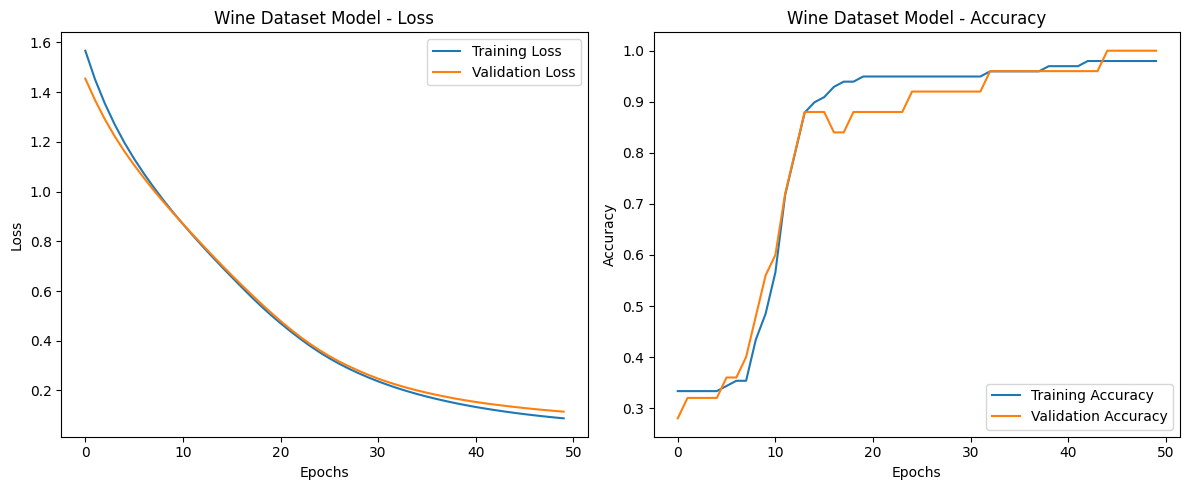

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


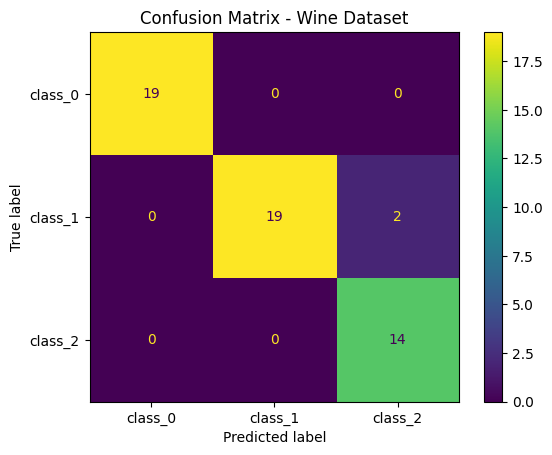

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_iris, load_wine
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to plot training and validation metrics
def plot_metrics(history, title="Training and Validation Metrics"):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Part 1: Modify the Neural Network for the Iris Dataset

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
target_names_iris = iris.target_names

# Preprocess the dataset
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

encoder = LabelBinarizer()
y_iris_encoded = encoder.fit_transform(y_iris)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_scaled, y_iris_encoded, test_size=0.3, random_state=42
)

# Original Neural Network
original_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_iris.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

original_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_original = original_model.fit(
    X_train_iris, y_train_iris,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Modified Neural Network
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_iris.shape[1],)),
    Dense(16, activation='relu'),  # New hidden layer with 16 neurons
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

modified_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_modified = modified_model.fit(
    X_train_iris, y_train_iris,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Evaluate both models
original_loss, original_acc = original_model.evaluate(X_test_iris, y_test_iris, verbose=0)
modified_loss, modified_acc = modified_model.evaluate(X_test_iris, y_test_iris, verbose=0)

print(f"Original Model - Test Loss: {original_loss:.4f}, Test Accuracy: {original_acc:.4f}")
print(f"Modified Model - Test Loss: {modified_loss:.4f}, Test Accuracy: {modified_acc:.4f}")

# Plot training and validation metrics
plot_metrics(history_original, title="Original Model")
plot_metrics(history_modified, title="Modified Model")

# Part 2: Neural Network for the Wine Dataset

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
target_names_wine = wine.target_names

# Preprocess the dataset
X_wine_scaled = scaler.fit_transform(X_wine)
y_wine_encoded = encoder.fit_transform(y_wine)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.3, random_state=42
)

# Build and train the model
wine_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_wine.shape[1],)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

wine_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_wine = wine_model.fit(
    X_train_wine, y_train_wine,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Evaluate the model
wine_loss, wine_acc = wine_model.evaluate(X_test_wine, y_test_wine, verbose=0)

print(f"Wine Dataset Model - Test Loss: {wine_loss:.4f}, Test Accuracy: {wine_acc:.4f}")

# Plot training and validation metrics
plot_metrics(history_wine, title="Wine Dataset Model")

# Confusion Matrix for the Wine Dataset
y_pred_wine = np.argmax(wine_model.predict(X_test_wine), axis=1)
y_true_wine = np.argmax(y_test_wine, axis=1)

ConfusionMatrixDisplay.from_predictions(y_true_wine, y_pred_wine, display_labels=target_names_wine)
plt.title("Confusion Matrix - Wine Dataset")
plt.show()
